In [1]:
import pandas as pd
import numpy as np


# time series data
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
import matplotlib.dates as mdates

import datetime
#from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()



# Hypothesis generation

    Traffic will increase as the years pass by
    Traffic will be high from May to October
    Traffic on weekdays will be more
    Traffic during the peak hours will be high

# Loading the data

In [2]:
df_train = pd.read_csv(r"C:/Users/eanusau/Documents/AI/Stat/Projects/TimeSeries/Time_series_hackathon/Train.csv")
df_test = pd.read_csv(r"C:/Users/eanusau/Documents/AI/Stat/Projects/TimeSeries/Time_series_hackathon/Test.csv")

In [3]:
df_train.head(),df_test.head()

(   ID          Datetime  Count
 0   0  25-08-2012 00:00      8
 1   1  25-08-2012 01:00      2
 2   2  25-08-2012 02:00      6
 3   3  25-08-2012 03:00      2
 4   4  25-08-2012 04:00      2,       ID          Datetime
 0  18288  26-09-2014 00:00
 1  18289  26-09-2014 01:00
 2  18290  26-09-2014 02:00
 3  18291  26-09-2014 03:00
 4  18292  26-09-2014 04:00)

In [4]:
df_test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [5]:
df_train.info(),df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


(None, None)

In [6]:
# make copy of the original
df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

In [7]:
# input date format 
DateFormat1 = "%d-%m-%Y %H:%M"
DateFormat2 = "%d/%m/%Y %H:%M"

def fix_date(series, patterns=[DateFormat1,DateFormat2]):
    datetimes = []
    for pat in patterns:
        datetimes.append(pd.to_datetime(series, format=pat, errors='coerce'))
    return pd.concat(datetimes, axis=1).ffill(axis=1).iloc[:, -1]

In [8]:
df_test_orig['Datetime'] = fix_date(df_test_orig['Datetime'])
df_test_orig['Datetime'] = pd.to_datetime(df_test_orig['Datetime'])
df_test_orig = df_test_orig.set_index('Datetime')
df_test_orig.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5112 entries, 2014-09-26 00:00:00 to 2015-04-26 23:00:00
Data columns (total 1 columns):
ID    5112 non-null int64
dtypes: int64(1)
memory usage: 79.9 KB


In [9]:
df_test['Datetime'] = fix_date(df_test['Datetime'])
df_test['Datetime'] = pd.to_datetime(df_test['Datetime'])
df_test = df_test.set_index('Datetime')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5112 entries, 2014-09-26 00:00:00 to 2015-04-26 23:00:00
Data columns (total 1 columns):
ID    5112 non-null int64
dtypes: int64(1)
memory usage: 79.9 KB


In [10]:
df_train['Datetime'] = fix_date(df_train['Datetime'])
df_train['Datetime'] = pd.to_datetime(df_train['Datetime'])
df_train = df_train.set_index('Datetime')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18288 entries, 2012-08-25 00:00:00 to 2014-09-25 23:00:00
Data columns (total 2 columns):
ID       18288 non-null int64
Count    18288 non-null int64
dtypes: int64(2)
memory usage: 428.6 KB


In [11]:
#df_train = df_train.astype({'Count': 'int64'}).dtypes

In [12]:
df_train.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


In [13]:
df_test.head()

,ID
Datetime,
2014-09-26 00:00:00,18288
2014-09-26 01:00:00,18289
2014-09-26 02:00:00,18290
2014-09-26 03:00:00,18291
2014-09-26 04:00:00,18292


In [14]:
df_train.shape,df_test.shape

((18288, 2), (5112, 1))

In [15]:
df_train.index, df_test.index

(DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
                '2012-08-25 02:00:00', '2012-08-25 03:00:00',
                '2012-08-25 04:00:00', '2012-08-25 05:00:00',
                '2012-08-25 06:00:00', '2012-08-25 07:00:00',
                '2012-08-25 08:00:00', '2012-08-25 09:00:00',
                ...
                '2014-09-25 14:00:00', '2014-09-25 15:00:00',
                '2014-09-25 16:00:00', '2014-09-25 17:00:00',
                '2014-09-25 18:00:00', '2014-09-25 19:00:00',
                '2014-09-25 20:00:00', '2014-09-25 21:00:00',
                '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
               dtype='datetime64[ns]', name='Datetime', length=18288, freq=None),
 DatetimeIndex(['2014-09-26 00:00:00', '2014-09-26 01:00:00',
                '2014-09-26 02:00:00', '2014-09-26 03:00:00',
                '2014-09-26 04:00:00', '2014-09-26 05:00:00',
                '2014-09-26 06:00:00', '2014-09-26 07:00:00',
                '2014-09-26 0

# Feature Extraction

We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [16]:
# df_train['Datetime'] = pd.to_datetime(df_train.Datetime,format='%d-%m-%Y %H:%M') 
# df_test['Datetime'] = pd.to_datetime(df_test.Datetime,format='%d-%m-%Y %H:%M')
# df_test_original['Datetime'] = pd.to_datetime(df_test_original.Datetime,format='%d/%m/%Y %H:%M')
# df_train_original['Datetime'] = pd.to_datetime(df_train_original.Datetime,format='%d-%m-%Y %H:%M')

In [17]:
df_train.isnull().sum()

ID       0
Count    0
dtype: int64

In [18]:
df_test.shape

(5112, 1)

In [19]:
df_test.isnull().sum()

ID    0
dtype: int64

# We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.


In [20]:
df_train.dtypes

ID       int64
Count    int64
dtype: object

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18288 entries, 2012-08-25 00:00:00 to 2014-09-25 23:00:00
Data columns (total 2 columns):
ID       18288 non-null int64
Count    18288 non-null int64
dtypes: int64(2)
memory usage: 428.6 KB


In [22]:
for i in (df_train, df_test, df_test_orig):
    i['year']=i.index.year 
    i['month']=i.index.month 
    i['day']=i.index.day
    i['Hour']=i.index.hour 
    i['dayofweek']=i.index.dayofweek
    
df_train['is_weekend'] = df_train.dayofweek.isin([5,6])*1
df_test['is_weekend'] = df_test.dayofweek.isin([5,6])*1
df_test_orig['is_weekend'] = df_test_orig.dayofweek.isin([5,6])*1

In [23]:
df_train.head()

,ID,Count,year,month,day,Hour,dayofweek,is_weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,0,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2,2012,8,25,4,5,1


In [24]:
# def get_weekend(row):
#     if row.dayOfWeek == 5 or row.dayOfWeek == 6:
#         return 1
#     else:
#         return 0
    
# temp1 = df_train.apply(get_weekend, axis =1)
# df_train['weekend']=temp1

# temp2 = df_test.apply(get_weekend, axis =1)
# df_test['weekend']=temp2

In [25]:
df_train.head()

,ID,Count,year,month,day,Hour,dayofweek,is_weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,0,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2,2012,8,25,4,5,1


In [26]:
df_test.head()

,ID,year,month,day,Hour,dayofweek,is_weekend
Datetime,,,,,,,
2014-09-26 00:00:00,18288,2014,9,26,0,4,0
2014-09-26 01:00:00,18289,2014,9,26,1,4,0
2014-09-26 02:00:00,18290,2014,9,26,2,4,0
2014-09-26 03:00:00,18291,2014,9,26,3,4,0
2014-09-26 04:00:00,18292,2014,9,26,4,4,0


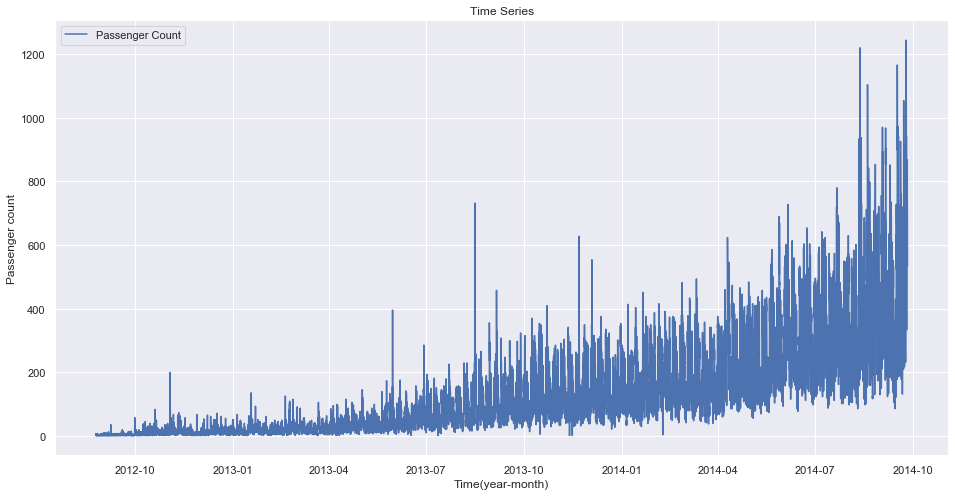

In [27]:
plt.figure(figsize=(16,8)) 
plt.plot(df_train.Count, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

# EDA

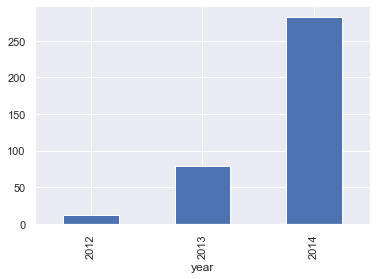

In [28]:
# Let us try to verify our hypothesis using the actual data.

# Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

df_train.groupby('year')['Count'].mean().plot.bar()

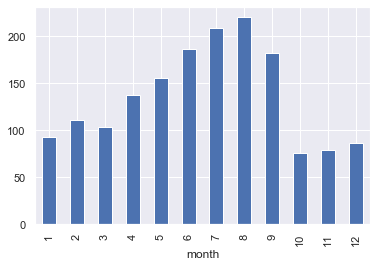

In [29]:
#Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

df_train.groupby('month')['Count'].mean().plot.bar()

# Here we see a decrease in the mean of passenger count in last three months.
# This does not look right. Let’s look at the monthly mean of each year separately.

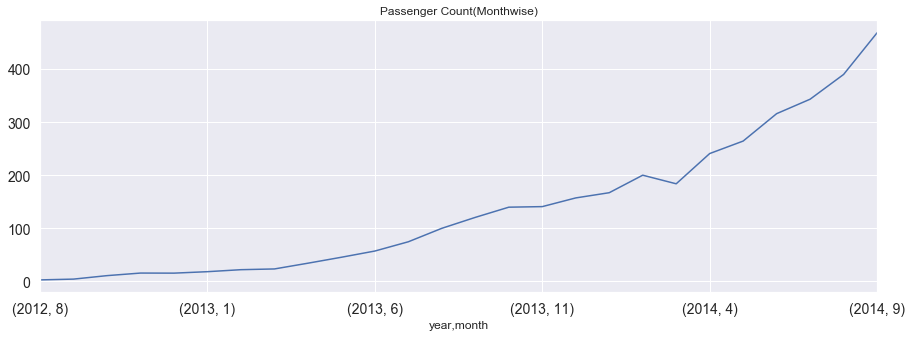

In [30]:
temp=df_train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

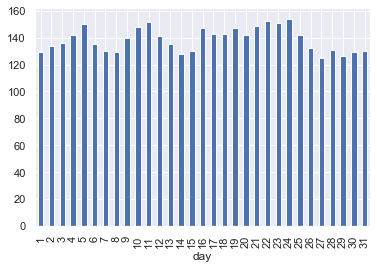

In [31]:
#Let’s look at the daily mean of passenger count.

df_train.groupby('day')['Count'].mean().plot.bar()

# We are not getting much insights from day wise count of the passengers.

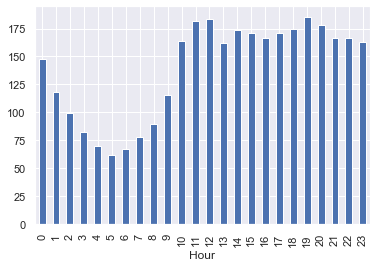

In [32]:
# We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

df_train.groupby('Hour')['Count'].mean().plot.bar()

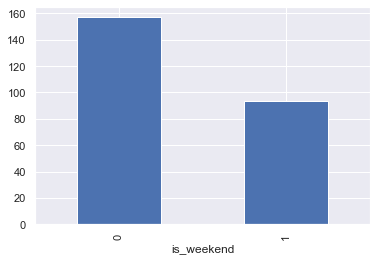

In [33]:
# Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

df_train.groupby('is_weekend')['Count'].mean().plot.bar()

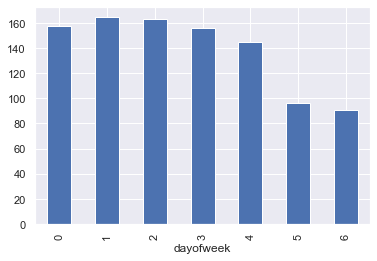

In [34]:
# Now we will try to look at the day wise passenger count.

# Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

df_train.groupby('dayofweek')['Count'].mean().plot.bar()

# As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [35]:
# Hourly time series 
hourly = df_train.resample('H').mean() 
# Converting to daily mean 
daily = df_train.resample('D').mean() 
# Converting to weekly mean 
weekly = df_train.resample('W').mean() 
# Converting to monthly mean 
monthly = df_train.resample('M').mean()

In [36]:
# columns = [hourly,daily,weekly,monthly]
# fig, axes = plt.subplots(4,1,figsize=(15,8)) 
# for name,ax in zip(columns, axes):
#     name.Count.plot(ax=ax)
#     plt.show()

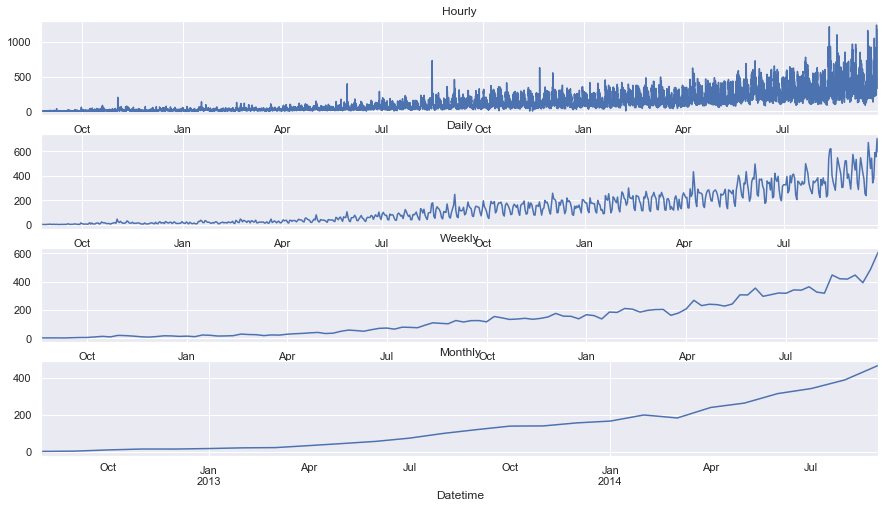

In [37]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', ax=axs[3]) 
plt.show()

In [38]:
# We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

# But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

df_test = df_test.drop(columns=['ID'],axis=1)

# Converting to daily mean 
df_test_daily = df_test.resample('D').mean() 

df_train = df_train.drop(columns=['ID'],axis=1)

# Converting to daily mean 
df_train_daily = df_train.resample('D').mean()

In [39]:
df_train_daily.shape, df_test_daily.shape

((762, 7), (213, 6))

In [40]:
df_train_daily.head()

,Count,year,month,day,Hour,dayofweek,is_weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0


In [41]:
df_test_daily.head()

,year,month,day,Hour,dayofweek,is_weekend
Datetime,,,,,,
2014-09-26,2014.0,9.0,26.0,11.5,4.0,0
2014-09-27,2014.0,9.0,27.0,11.5,5.0,1
2014-09-28,2014.0,9.0,28.0,11.5,6.0,1
2014-09-29,2014.0,9.0,29.0,11.5,0.0,0
2014-09-30,2014.0,9.0,30.0,11.5,1.0,0


# Splitting the data into training and validation part

In [42]:
train = df_train_daily.loc['2012-08-25':'2014-06-25']
valid = df_train_daily.loc['2014-06-25':'2014-09-25']

In [43]:
train.shape, valid.shape

((670, 7), (93, 7))

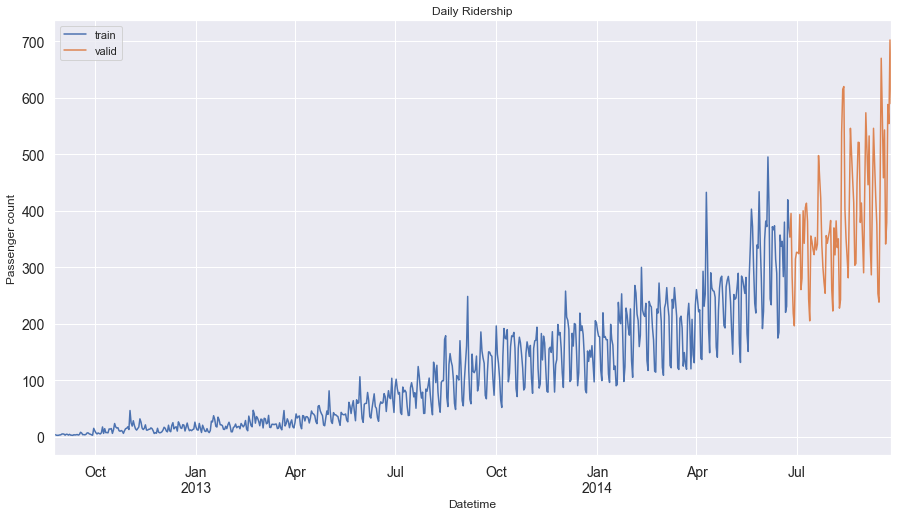

In [44]:
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

Here the blue part represents the train data and the orange part represents the validation data.

We will predict the traffic for the validation part and then visualize how accurate our predictions are. 

Finally we will make predictions for the test dataset.

# Modeling Techniques

# Naive Approach

In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction. 

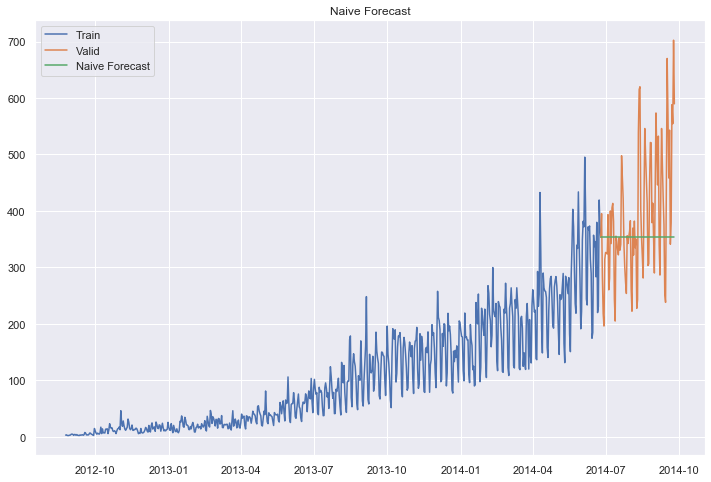

In [45]:
dd= np.asarray(train.Count) 
y_pred = valid.copy() 
y_pred['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_pred['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [46]:
dd[len(dd)-1] 

353.6666666666667

In [47]:
y_pred.isnull().sum()
# y_pred = y_pred.dropna()
# y_pred.isnull().sum()
#y_pred

Count         0
year          0
month         0
day           0
Hour          0
dayofweek     0
is_weekend    0
naive         0
dtype: int64

In [48]:
valid.Count.shape,y_pred.naive.shape

((93,), (93,))

In [49]:
from sklearn.metrics import mean_squared_error
print("Naive RMSE :% 0.3f" % np.sqrt(mean_squared_error(valid.Count,y_pred.naive)))

Naive RMSE : 116.074


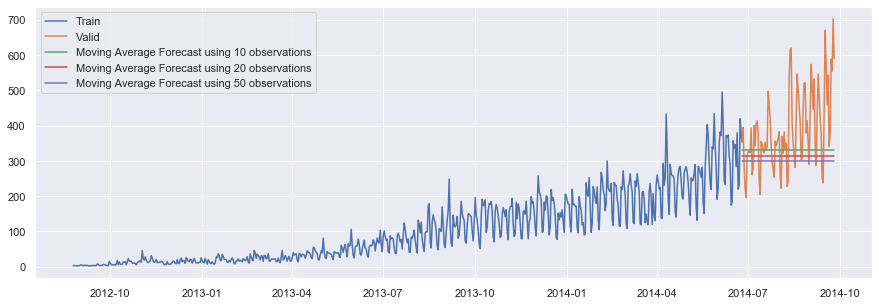

In [50]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_10avg_forecast'] = train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
y_hat_avg['moving_20avg_forecast'] = train['Count'].rolling(20).mean().iloc[-1] # average of last 10 observations. 
y_hat_avg['moving_50avg_forecast'] = train['Count'].rolling(50).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_10avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.plot(y_hat_avg['moving_20avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.plot(y_hat_avg['moving_50avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show() 

In [51]:
from sklearn.metrics import mean_squared_error
print("Naive RMSE :% 0.3f" % np.sqrt(mean_squared_error(valid.Count,y_hat_avg['moving_10avg_forecast'])))

Naive RMSE : 125.410


#  Simple Exponential Smoothing


Simple Exponential Smoothing
In this technique, we assign larger weights to more recent observations than to observations from the distant past.

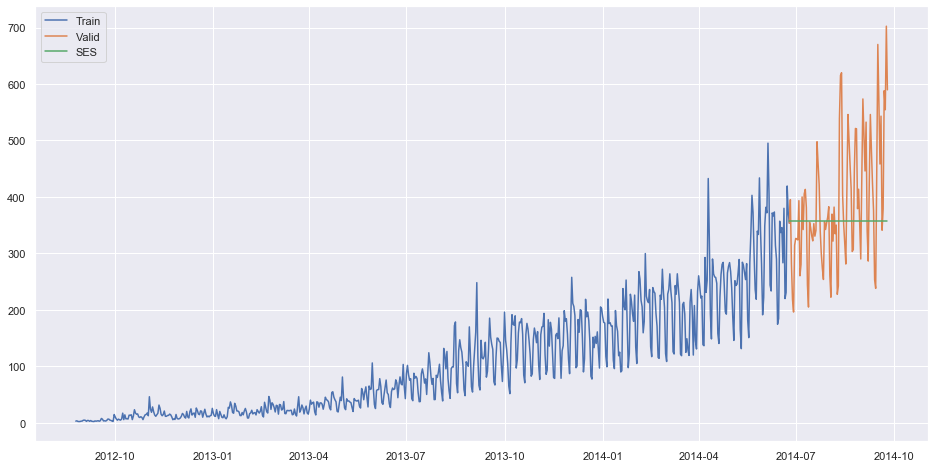

In [52]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_valid_df = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_valid_df['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_valid_df['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
print("Naive RMSE :% 0.3f" % np.sqrt(mean_squared_error(valid.Count,y_valid_df['SES'])))

Naive RMSE : 114.925


#  Holt’s Linear Trend Model
It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.
First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.

Observed, which is the original time series.
Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
Seasonal, which tells us about the seasonality in the time series.
Residual, which is obtained by removing any trend or seasonality in the time series.

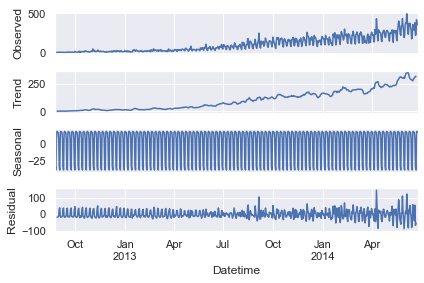

In [54]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

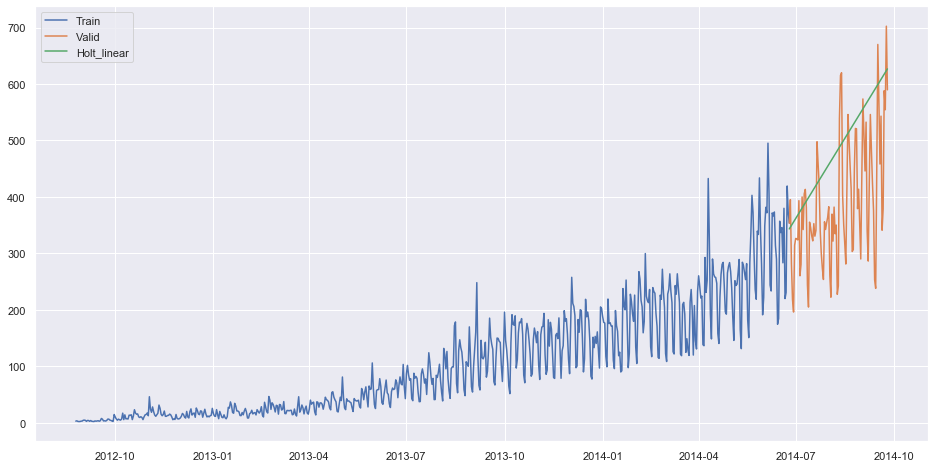

In [55]:
# An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

y_valid_copy = valid.copy() 
fit_holt = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_valid_copy['Holt_linear'] = fit_holt.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_valid_copy['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

We can see an inclined line here as the model has taken into consideration the trend of the time series.

In [56]:
print("Holt model RMSE :% 0.3f" % np.sqrt(mean_squared_error(valid.Count,y_valid_copy['Holt_linear'])))

Holt model RMSE : 137.076


# so now make Holt’s Linear Trend Model on daily time series

Now let’s try to make holt’s linear trend model on the daily time series and make predictions on the test dataset.
We will make predictions based on the daily time series and then will distribute that daily prediction to hourly predictions.
We have fitted the holt’s linear trend model on the train dataset and validated it using validation dataset.

In [57]:
df_test_daily['prediction']=fit_holt.forecast(len(df_test_daily))

In [58]:
df_test_orig.head()

,ID,year,month,day,Hour,dayofweek,is_weekend
Datetime,,,,,,,
2014-09-26 00:00:00,18288,2014,9,26,0,4,0
2014-09-26 01:00:00,18289,2014,9,26,1,4,0
2014-09-26 02:00:00,18290,2014,9,26,2,4,0
2014-09-26 03:00:00,18291,2014,9,26,3,4,0
2014-09-26 04:00:00,18292,2014,9,26,4,4,0


In [59]:
#df_test_daily = df_test_daily.drop(columns=['year','month','day','Hour','dayOfWeek','weekend'],axis=1)

In [60]:
df_test_daily.head()

,year,month,day,Hour,dayofweek,is_weekend,prediction
Datetime,,,,,,,
2014-09-26,2014.0,9.0,26.0,11.5,4.0,0,343.434258
2014-09-27,2014.0,9.0,27.0,11.5,5.0,1,346.512980
2014-09-28,2014.0,9.0,28.0,11.5,6.0,1,349.591701
2014-09-29,2014.0,9.0,29.0,11.5,0.0,0,352.670422
2014-09-30,2014.0,9.0,30.0,11.5,1.0,0,355.749144


# we need to convert the daily predictions to hourly predictions

In [65]:
# Calculate average hourly fraction

# Calculating the hourly ratio of count
df_train['ratio']=df_train['Count']/df_train['Count'].sum() 

# Grouping the hourly ratio 
temp=df_train.groupby(['Hour'])['ratio'].sum() 

# Groupby to csv format 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('Hour.1',1) 

# Merge Test and test_original on day, month and year 
merge=pd.merge(df_test_daily, df_test_orig, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

#print(prediction.head())

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24
#prediction['ID']=prediction['ID_y']

# Let’s drop all other features from the submission file and keep ID and Count only.

submission=prediction.drop(['day', 'prediction','Hour', 'ratio','dayofweek_x','dayofweek_y','is_weekend_x','is_weekend_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

In [66]:
submission.shape, df_test_orig.shape

((5112, 2), (5112, 7))

In [67]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID       5112 non-null int64
Count    5112 non-null float64
dtypes: float64(1), int64(1)
memory usage: 119.8 KB


In [68]:
# # Calculate average hourly fraction
# hourly_frac = df_train.groupby(['Hour']).mean()/np.sum(df_train.groupby(['Hour']).mean())
# hourly_frac.drop(['year','month','day','dayOfWeek','weekend'], axis = 1, inplace = True)
# hourly_frac = hourly_frac.reset_index()
# hourly_frac =  hourly_frac.rename(columns={'Count':'ratio'})
# hourly_frac.head()

In [69]:
# df_test_hourly = df_test_daily.resample('H').ffill()
# # df_preds = df_test_daily.assign(key=1).merge(hourly_frac.assign(key=1)).drop('key', axis=1)
# # df_preds['hourly_prediction'] = df_preds['prediction'] * df_preds['ratio']

In [70]:
# df_test_hourly.head(50)

In [71]:
# df_test_orig['Datetime'] = fix_date(df_test_orig['Datetime'])

In [72]:
# df_test_hourly = df_test_hourly.reset_index()

In [73]:
#df_test_hourly = df_test_hourly.drop(columns=['year','month','day','Hour','dayOfWeek','weekend'],axis=1)

In [74]:
# df_test_orig.info()

In [75]:
# prediction=pd.merge(df_test_orig, df_test_hourly,on='Datetime',how='left') 

In [76]:
# prediction.head(3)

In [77]:
# pd.DataFrame(prediction, columns=['ID','Datetime','prediction']).to_csv('Holt_linear.csv')

In [78]:
# submission = pd.read_csv('Holt_linear.csv').drop(columns='Unnamed: 0')
# submission.fillna(method='ffill', inplace=True)

In [79]:
# submission.head()

In [80]:
# submission.isnull().sum()

# Holt winter’s model on daily time series


    Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

    The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices.

    One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

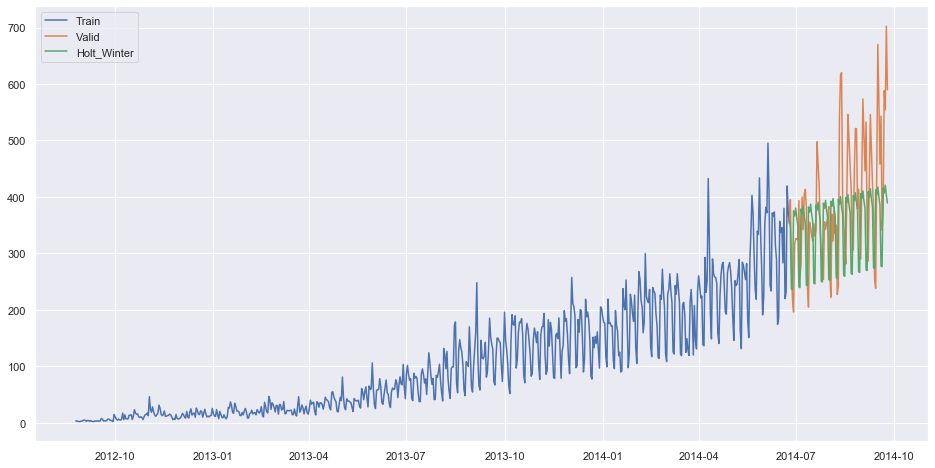

In [81]:
y_valid_copy = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_valid_copy['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_valid_copy['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [82]:
print("Holt model RMSE :% 0.3f" % np.sqrt(mean_squared_error(valid.Count,y_valid_copy['Holt_Winter'])))

Holt model RMSE : 111.406


In [83]:
# df_test_daily['prediction']=fit_holt.forecast(len(df_test_daily))
# df_test_hourly = df_test_daily.resample('H').ffill()
# df_test_hourly = df_test_hourly.reset_index()
# df_test_hourly = df_test_hourly.drop(columns=['year','month','day','Hour','dayOfWeek','weekend'],axis=1)
# prediction=pd.merge(df_test_orig, df_test_hourly,on='Datetime',how='left') 
# prediction.fillna(method='ffill', inplace=True)
# pd.DataFrame(prediction, columns=['ID','Datetime','prediction']).to_csv('Holt_winter.csv')
# submission = pd.read_csv('Holt_winter.csv').drop(columns='Unnamed: 0')

In [84]:
# Let’s forecast the Counts for the entire length of the Test dataset.

df_test_daily['prediction']=fit1.forecast(len(df_test_daily))

# Now we will convert these daily passenger count into hourly passenger count using the same approach which we followed above.

In [86]:
# Merge Test and test_original on day, month and year 
merge=pd.merge(df_test_daily, df_test_orig, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24
#prediction['ID']=prediction['ID_y']

# Let’s drop all other features from the submission file and keep ID and Count only.

#submission=prediction.drop(['day', 'prediction','Hour', 'ratio','dayOfWeek_x','dayofweek','weekend'],axis=1) 
submission=prediction.drop(['day', 'prediction','Hour', 'ratio','dayofweek_x','dayofweek_y','is_weekend_x','is_weekend_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt Winter.csv')

Holt winters model produced rmse of 328.356 on the leaderboard.
The possible reason behind this may be that this model was not that good in predicting the trend of the time series but worked really well on the seasonality part.
Till now we have made different models for trend and seasonality. Can’t we make a model which will consider both the trend and seasonality of the time series?

Yes we can. We will look at the ARIMA model for time series forecasting

# Introduction to ARIMA model
ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).

Here p is the order of the autoregressive model(number of time lags)
d is the degree of differencing(number of times the data have had past values subtracted)
q is the order of moving average model. We will discuss more about these parameters in next section.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.

What is a stationary time series?
There are three basic criterion for a series to be classified as stationary series :

    The mean of the time series should not be a function of time. It should be constant.
    The variance of the time series should not be a function of time.
    THe covariance of the ith term and the (i+m)th term should not be a function of time.
    Why do we have to make the time series stationary?
    We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.

If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data. To learn more about stationarity you can refer this article: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

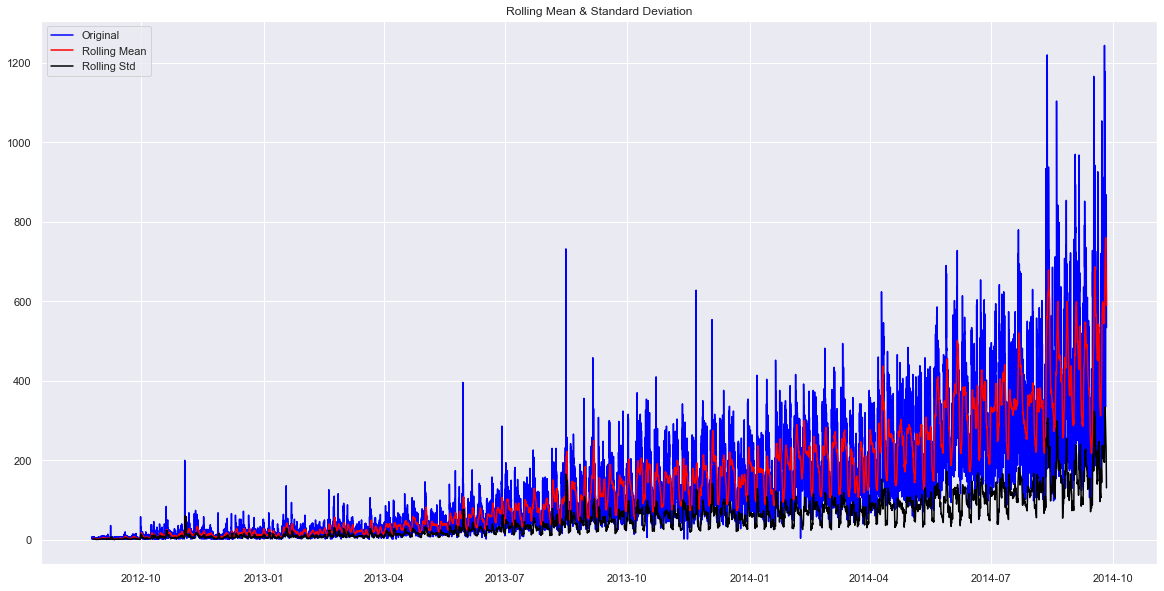

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [87]:
#Let’s make a function which we can use to calculate the results of Dickey-Fuller test.

from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(df_train['Count'])

The statistics shows that the time series is stationary as Test Statistic < Critical value but we can 
see an increasing trend in the data. So, firstly we will try to make the data more stationary. 
For doing so, we need to remove the trend and seasonality from the data

# Removing Trend

    A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

    We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

    We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.

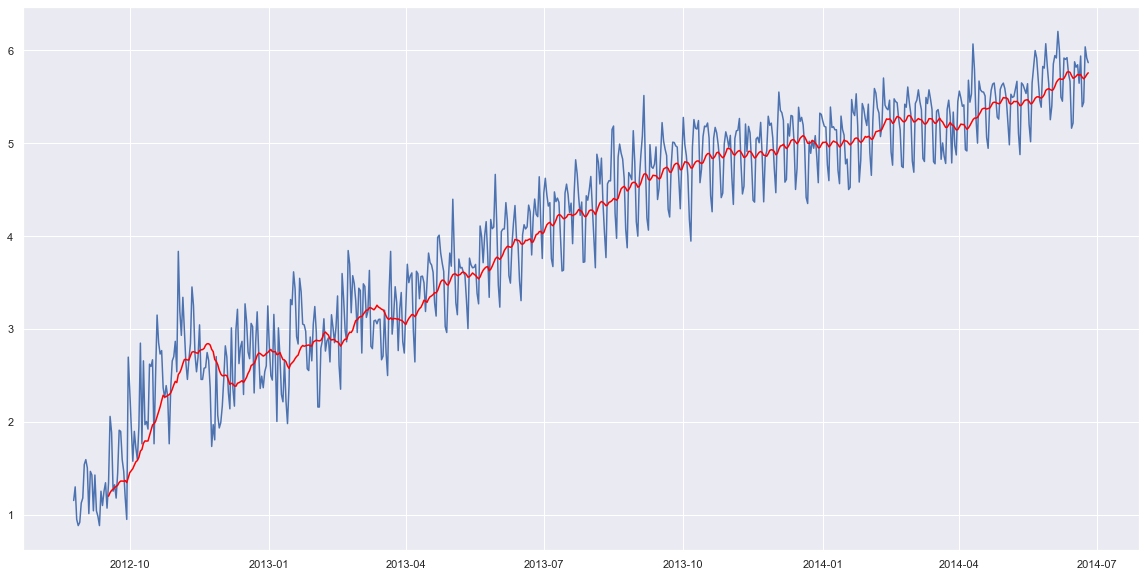

In [88]:
Train_log = np.log(train['Count']) 
valid_log = np.log(valid['Count'])
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.
Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

In [89]:
train_log_moving_avg_diff = Train_log - moving_avg

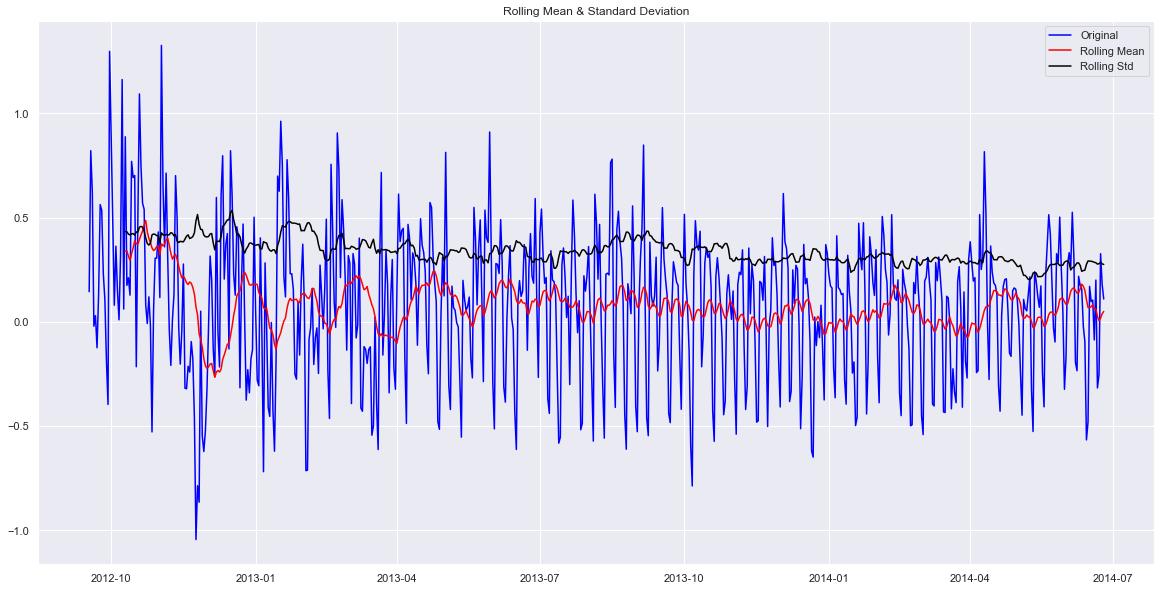

Results of Dickey-Fuller Test:
Test Statistic                -5.867311e+00
p-value                        3.302272e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.260000e+02
Critical Value (1%)           -3.440839e+00
Critical Value (5%)           -2.866168e+00
Critical Value (10%)          -2.569235e+00
dtype: float64


In [90]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

We can see that the Test Statistic is very smaller as compared to the Critical Value. 
So, we can be confident that the trend is almost removed.

Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

Differencing can help to make the series stable and eliminate the trend

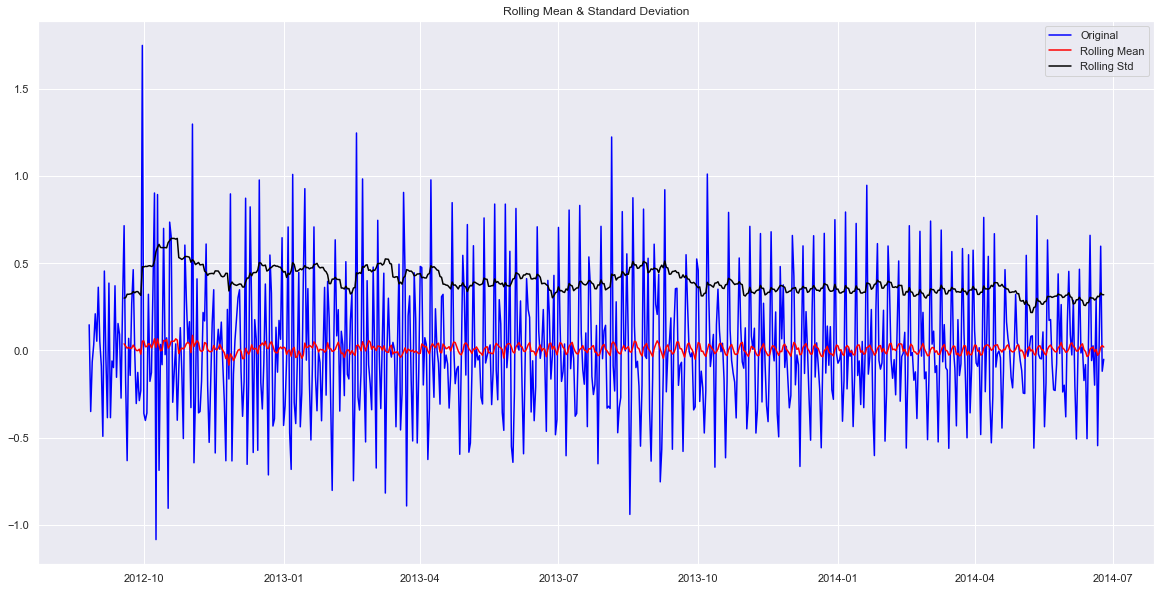

Results of Dickey-Fuller Test:
Test Statistic                -8.253359e+00
p-value                        5.317209e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.490000e+02
Critical Value (1%)           -3.440466e+00
Critical Value (5%)           -2.866004e+00
Critical Value (10%)          -2.569147e+00
dtype: float64


In [91]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

# Removing Seasonality

By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
Seasonality is always of a fixed and known period.
We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

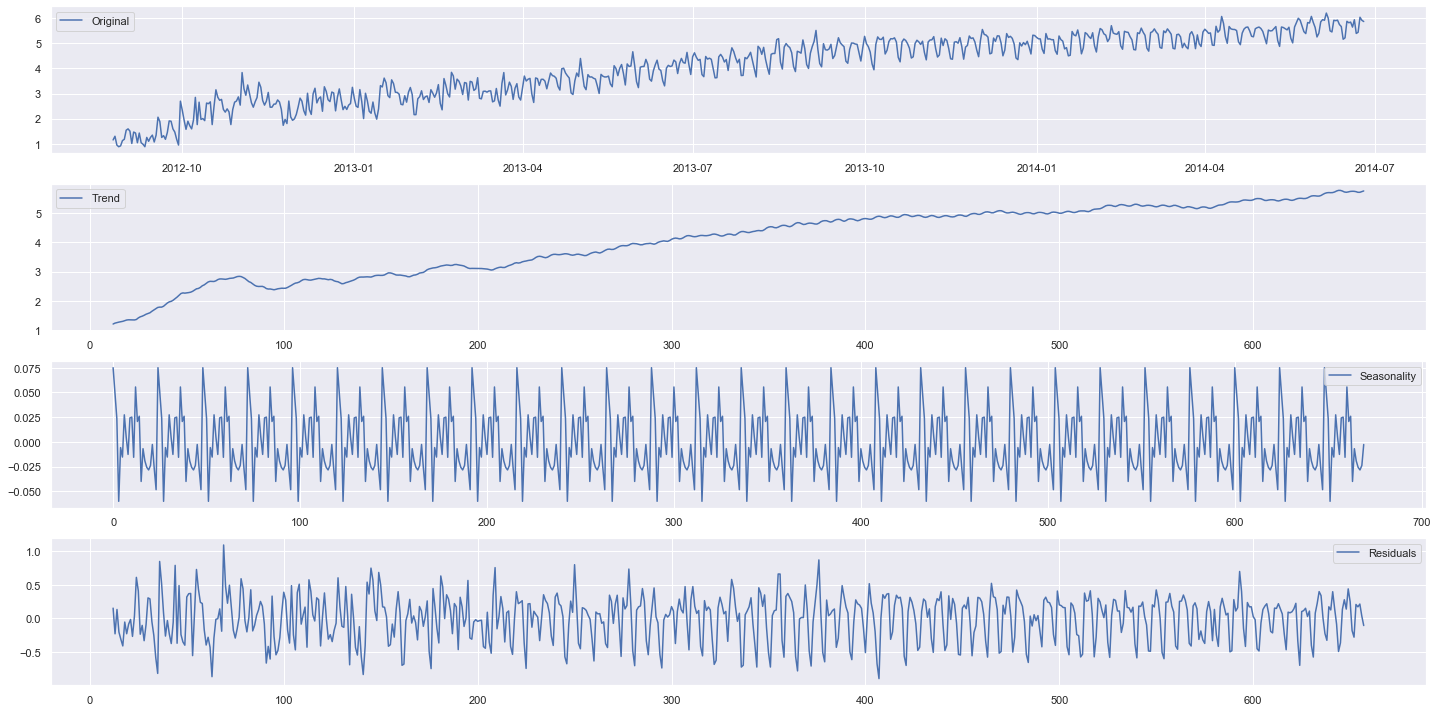

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.

Let’s check stationarity of residuals.

                   0
date                
2012-09-06  0.153459
2012-09-07 -0.228333
2012-09-08  0.133512
2012-09-09 -0.201657
2012-09-10 -0.310044


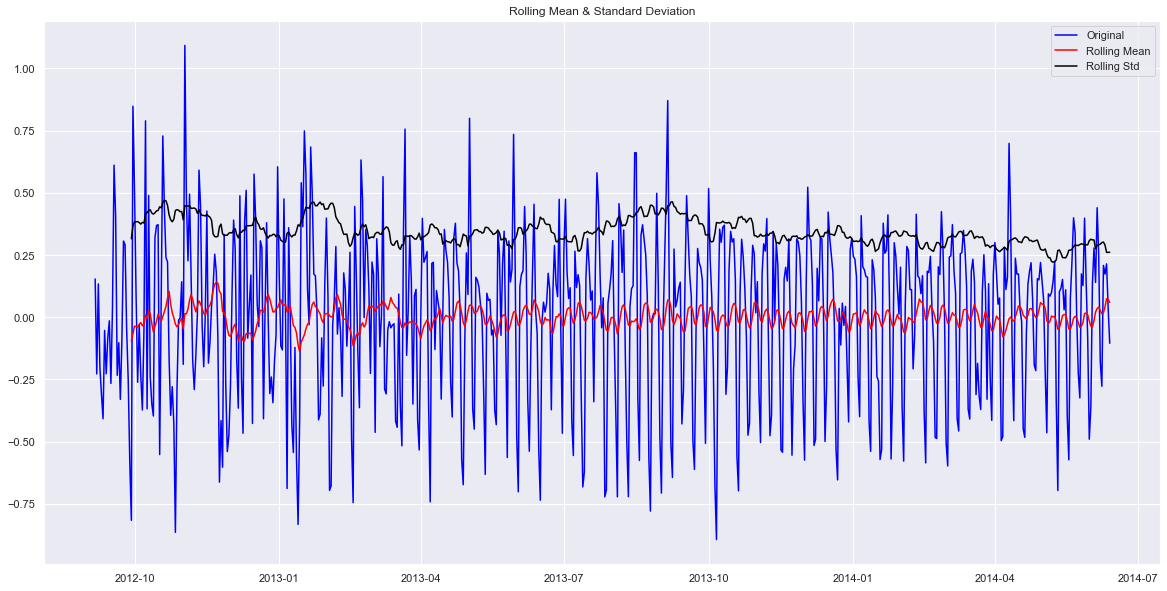

Results of Dickey-Fuller Test:
Test Statistic                -7.830840e+00
p-value                        6.299419e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [93]:
train_log_decompose = pd.DataFrame(residual)     # make a DF
train_log_decompose['date'] = Train_log.index  # create a new column Date
train_log_decompose.set_index('date', inplace = True)   # set date as index
train_log_decompose.dropna(inplace=True) 
print(train_log_decompose.head())
test_stationarity(train_log_decompose[0])

In [94]:
train_log_decompose.head()

,0
date,
2012-09-06,0.153459
2012-09-07,-0.228333
2012-09-08,0.133512
2012-09-09,-0.201657
2012-09-10,-0.310044


It can be interpreted from the results that the residuals are stationary.

Now we will forecast the time series using different models.

# Forecasting the time series using ARIMA

First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.

ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

In [95]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

C:\Users\eanusau\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


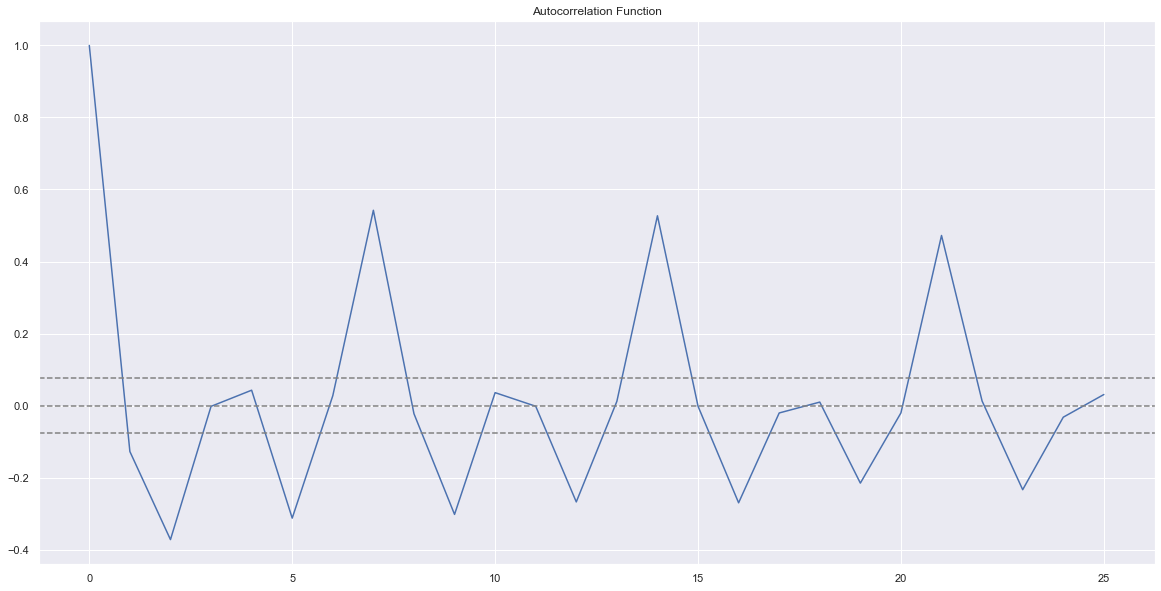

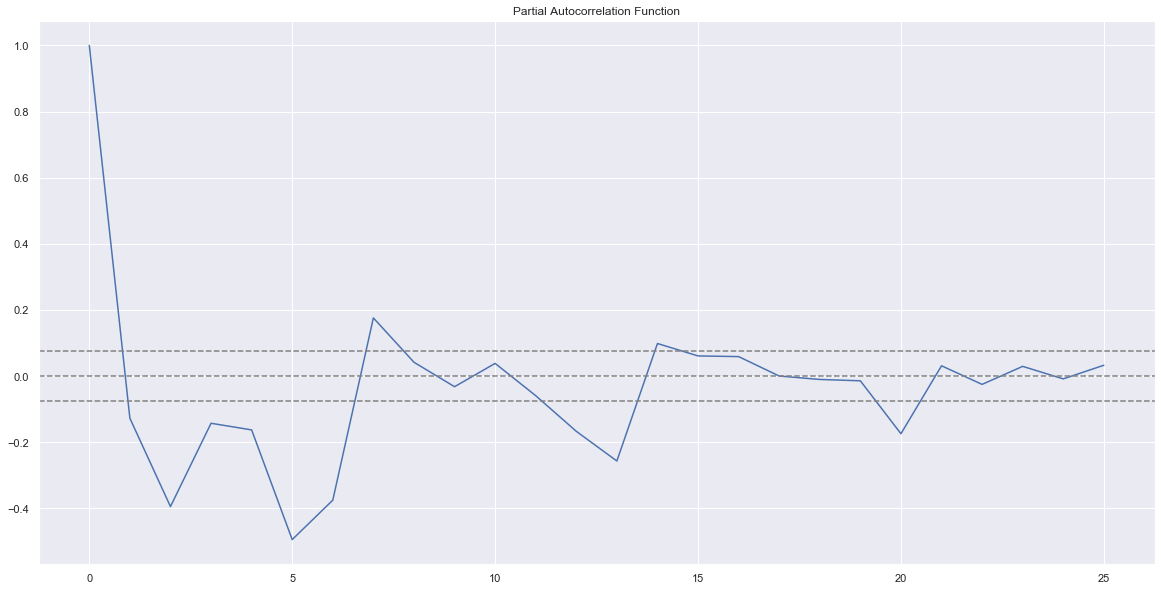

In [96]:
# ACF and PACF plot
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function') 
plt.show()

p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.
q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

# AR model
The autoregressive model specifies that the output variable depends linearly on its own previous values.

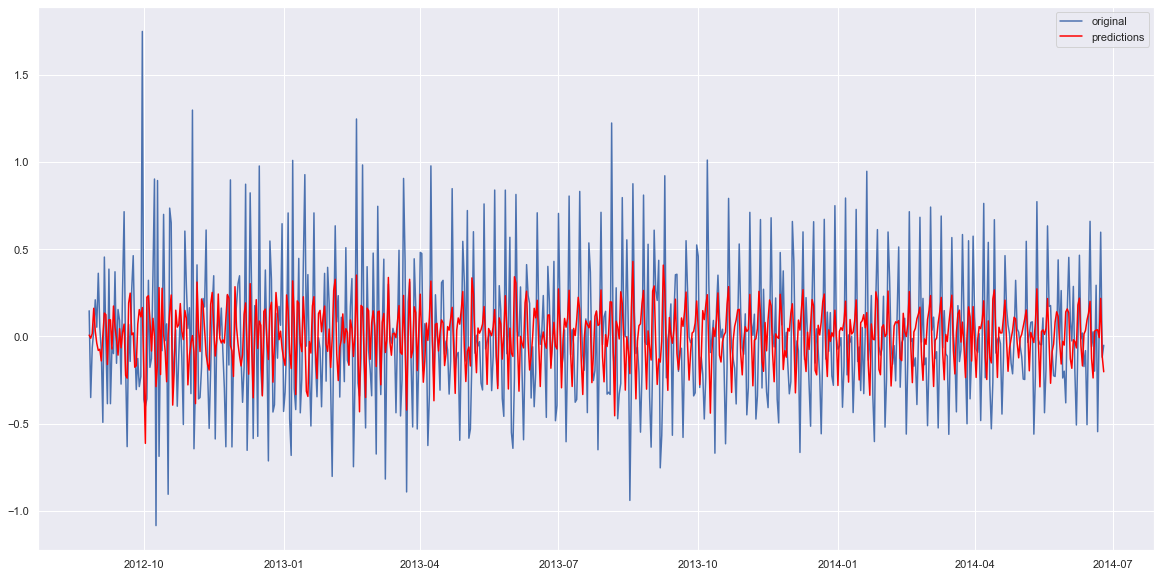

In [97]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

Lets plot the validation curve for AR model.

We have to change the scale of the model to the original scale.

First step would be to store the predicted results as a separate series and observe it.

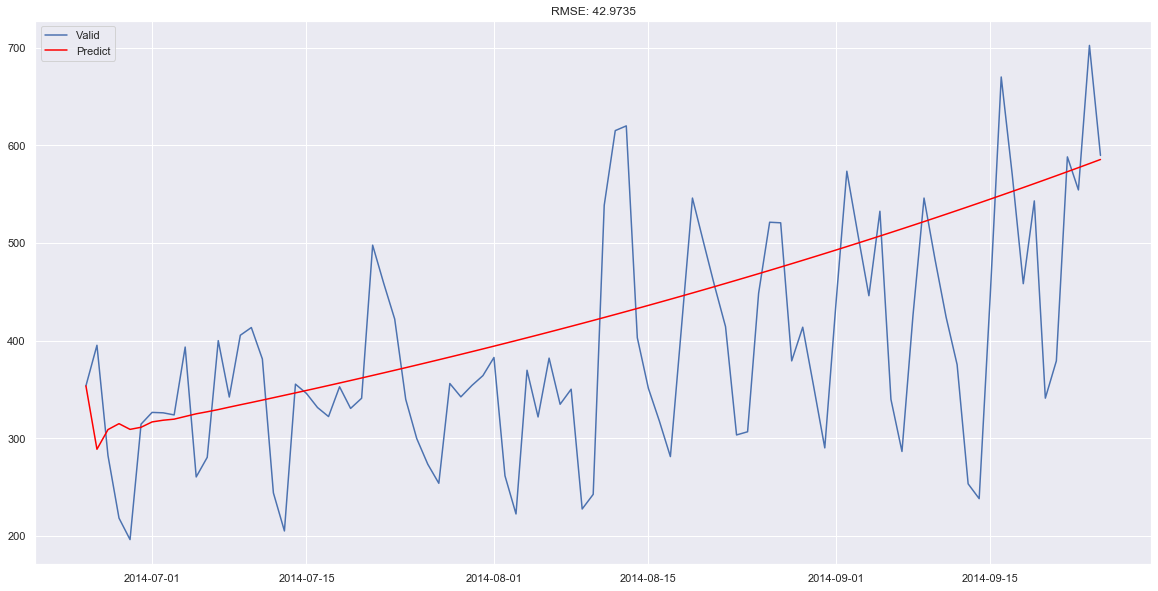

In [98]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25") 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0])) 
plt.show()

# MA model
The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

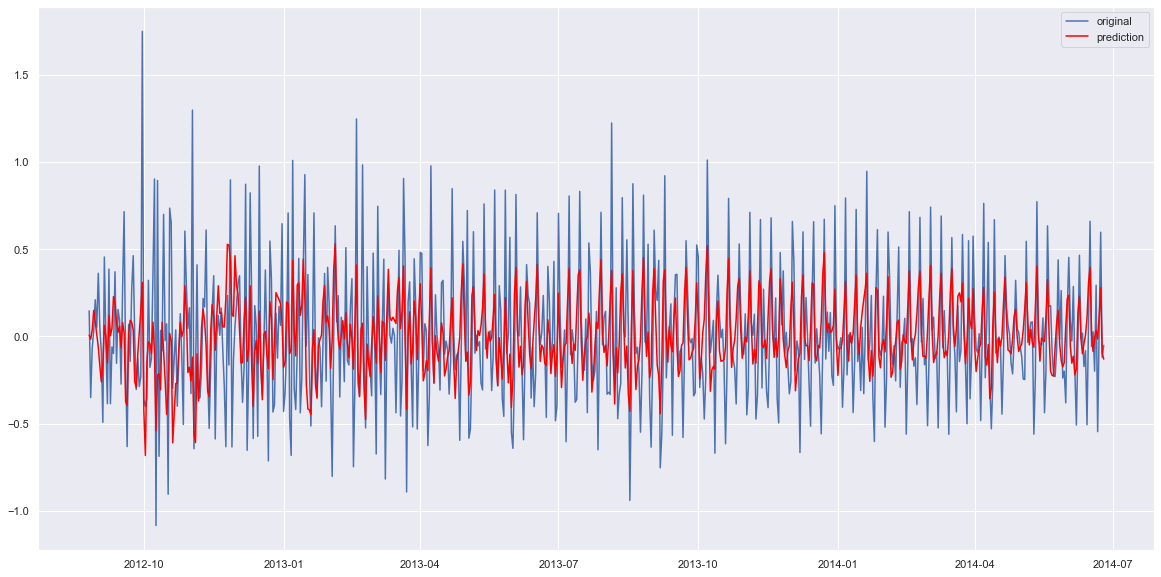

In [99]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model.(p,d,q) order of the mode
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

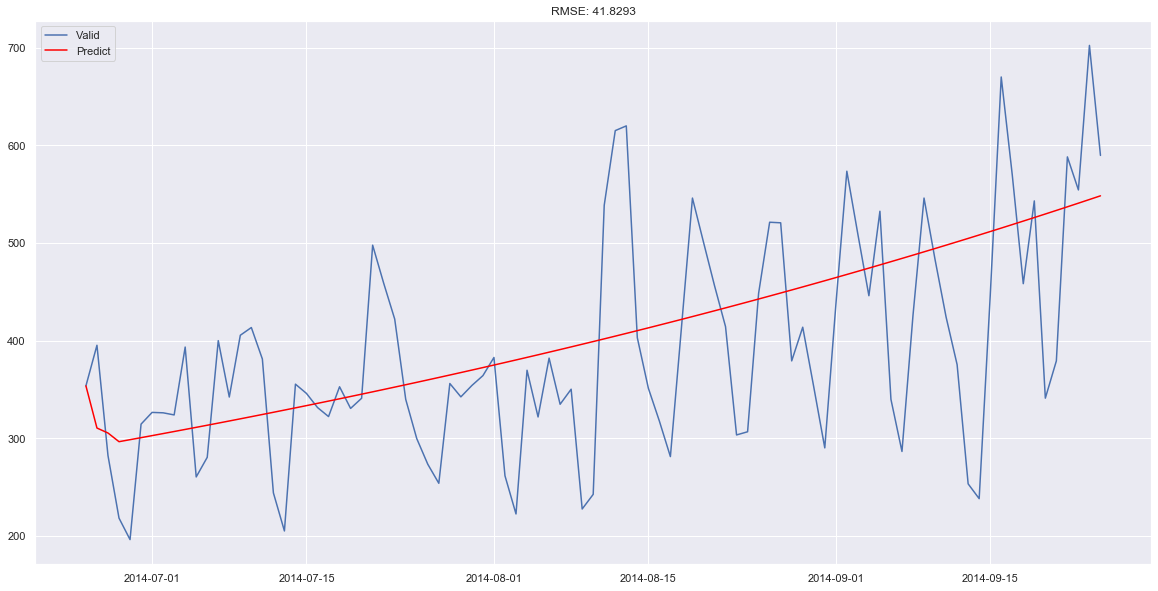

In [100]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

# Combined model
Now let’s combine these two models.

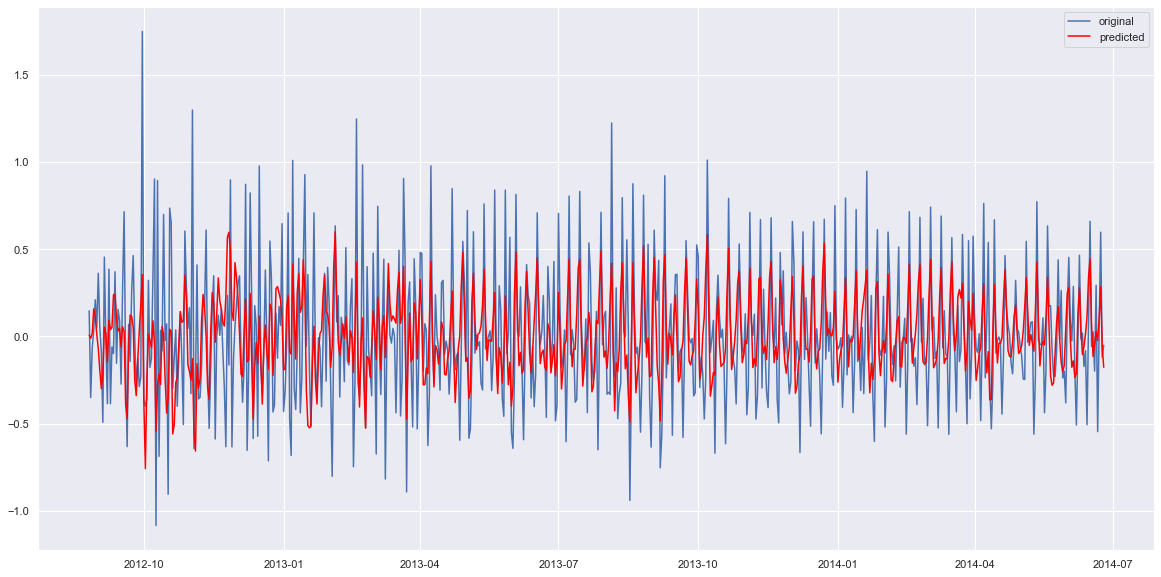

In [101]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

Let’s define a function which can be used to change the scale of the model to the original scale.

In [102]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

Let’s predict the values for validation set.

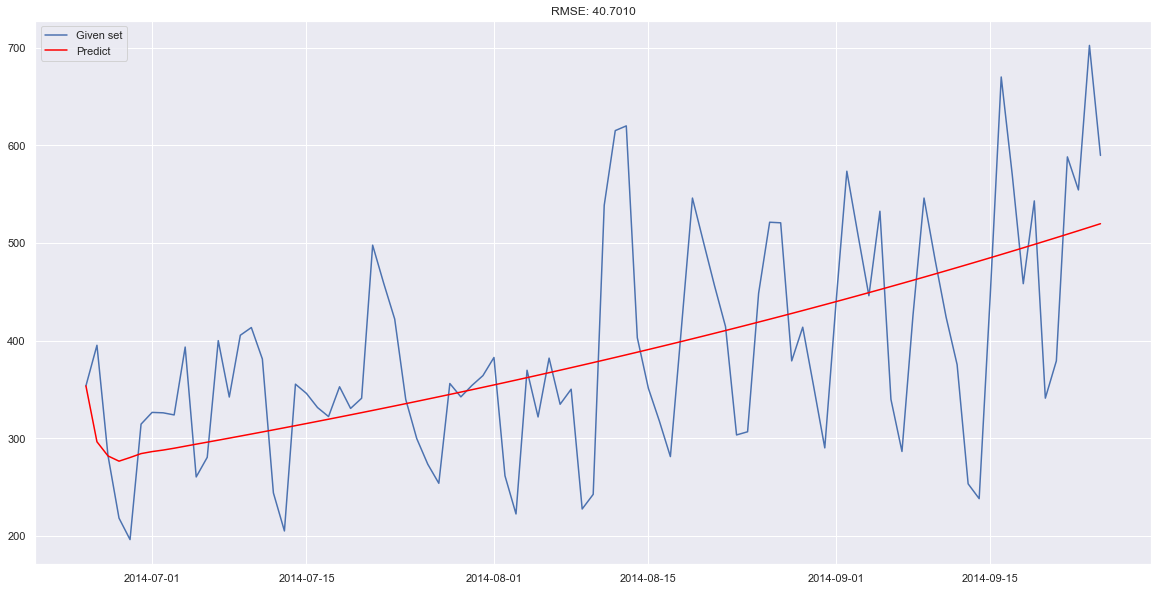

In [103]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)

# SARIMAX model on daily time series
SARIMAX model takes into account the seasonality of the time series. So we will build a SARIMAX model on the time series.

C:\Users\eanusau\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


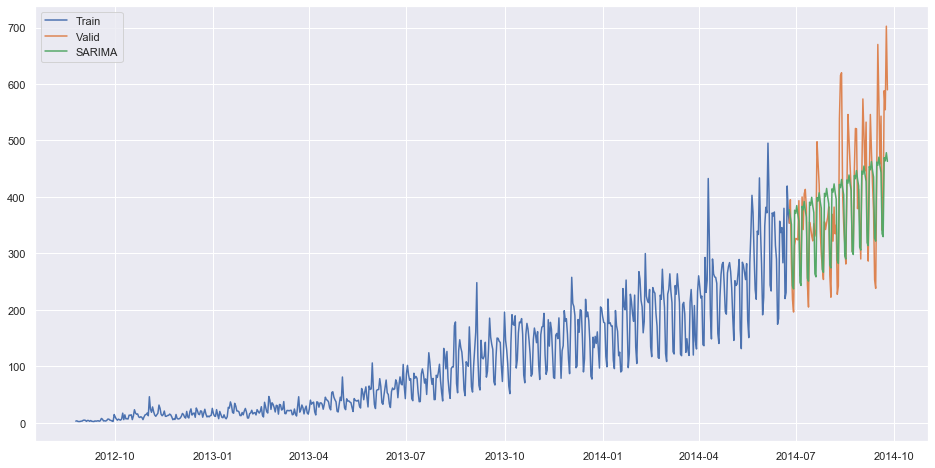

In [104]:
import statsmodels.api as sm
y_hat_avg = valid.copy() 
fit_SARIMAX = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit_SARIMAX.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 
plt.figure(figsize=(16,8)) 
plt.plot( train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

Order in the above model represents the order of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.

Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

In [105]:
rms = np.sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA)) 
print(rms)

70.36107160335038


Now we will forecast the time series for Test data which starts from 2014-9-26 and ends at 2015-4-26.

In [106]:
predict=fit_SARIMAX.predict(start="2014-09-26", end="2015-04-26", dynamic=True)
#predict=fit_SARIMAX.predict(start="2014-09-26", end="2015-04-26", dynamic=True)

C:\Users\eanusau\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


Note that these are the daily predictions and we need hourly predictions. 
So, we will distribute this daily prediction into hourly counts.
To do so, we will take the ratio of hourly distribution of
passenger count from train data and then we will distribute the predictions in the same ratio.

Note that these are the daily predictions and we need hourly predictions. So, we will distribute this daily prediction into hourly counts. To do so, we will take the ratio of hourly 
distribution of passenger count from train data and then we will distribute the predictions in the same ratio.

In [107]:
df_test_daily['prediction']=predict

In [109]:
# Merge Test and test_original on day, month and year 
merge=pd.merge(df_test_daily, df_test_orig, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y'] 
merge=merge.drop(['year', 'month', 'Hour_x','Hour_y'], axis=1) 

# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24
#prediction['ID']=prediction['ID_y']

# Let’s drop all other features from the submission file and keep ID and Count only.

#submission=prediction.drop(['day', 'prediction','Hour', 'ratio','dayOfWeek_x','dayOfWeek_y','weekend'],axis=1) 
submission=prediction.drop(['day', 'prediction','Hour', 'ratio','dayofweek_x','dayofweek_y','is_weekend_x','is_weekend_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')

In [110]:
prediction.head()

,day,dayofweek_x,is_weekend_x,prediction,ID,dayofweek_y,is_weekend_y,Hour,ratio,Count
0,26.0,4.0,0,446.148388,18288,4,0,0,0.044287,474.201354
1,26.0,4.0,0,446.148388,18289,4,0,1,0.035343,378.437490
2,26.0,4.0,0,446.148388,18290,4,0,2,0.029911,320.274678
3,26.0,4.0,0,446.148388,18291,4,0,3,0.024714,264.631524
4,26.0,4.0,0,446.148388,18292,4,0,4,0.020802,222.741154
